In [1]:
# libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier, CatBoostRegressor

In [2]:
# data prep
df = pd.read_csv('train_dataset_train.csv', nrows=300000)
df

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,CA501E00254255E0A11F9FAFFD322E2D,КОШЕЛЕК,2013,Ул. Горчакова,12005,Улица Горчакова,12,Бутовская,2022-09-13 10:28:52,169.950000,3022
299996,299997,530705A18FB1BA7B2675986E2EC35FCD,СК учащегося 30 дней,236,Бабушкинская (Северный),6003,Бабушкинская,6,Калужско-Рижская,2022-09-13 10:28:53,334.333333,2003
299997,299998,AC5B356A24955D7A1A60FE00E9F0F441,30 дней ЕДИНЫЙ ТК,301,Рязанский проспект (Западный),7016,Рязанский проспект,7,Таганско-Краснопресненская,2022-09-13 10:28:54,354.850000,3001
299998,299999,D912316CF3BF3271820A26C606F8DF8B,Социальная карта москвича,2117,Котельники(Первый),7007,Котельники,7,Таганско-Краснопресненская,2022-09-13 10:28:54,130.283333,7004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              300000 non-null  int64  
 1   ticket_id       300000 non-null  object 
 2   ticket_type_nm  300000 non-null  object 
 3   entrance_id     300000 non-null  int64  
 4   entrance_nm     300000 non-null  object 
 5   station_id      300000 non-null  int64  
 6   station_nm      300000 non-null  object 
 7   line_id         300000 non-null  int64  
 8   line_nm         300000 non-null  object 
 9   pass_dttm       300000 non-null  object 
 10  time_to_under   300000 non-null  float64
 11  label           300000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 27.5+ MB


In [4]:
# NaN values
df[df.isna()==True].count()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [5]:
cols = df.columns
for col in cols:
    print(f"уникальных значений в {col}: {df[col].nunique()}\n")

уникальных значений в id: 300000

уникальных значений в ticket_id: 214865

уникальных значений в ticket_type_nm: 59

уникальных значений в entrance_id: 424

уникальных значений в entrance_nm: 424

уникальных значений в station_id: 274

уникальных значений в station_nm: 243

уникальных значений в line_id: 16

уникальных значений в line_nm: 16

уникальных значений в pass_dttm: 59275

уникальных значений в time_to_under: 52952

уникальных значений в label: 276



<AxesSubplot:>

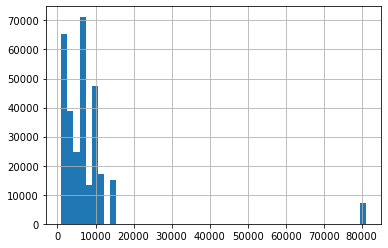

In [6]:
df["label"].hist(bins = 50)

<AxesSubplot:>

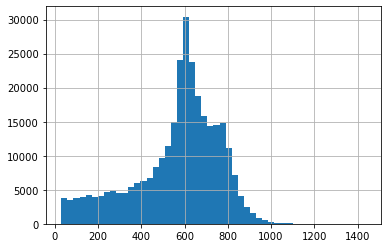

In [7]:
df["time_to_under"].hist(bins = 50)

In [8]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [9]:
# feature engineering
df["ticket_type_nm"].value_counts()

КОШЕЛЕК                                                   73089
30 дней ЕДИНЫЙ ТК                                         49481
Социальная карта москвича                                 34319
30 дней                                                   31376
90 дней ЕДИНЫЙ ТК                                         16802
60 поездок ЕДИНЫЙ ТК                                      14543
30 дней Пригород ТК                                       12389
30 дней СК студента                                       11863
СК студента 30 дней                                        9991
ББК                                                        7647
30 дней СК учащегося                                       6612
365 дней ЕДИНЫЙ ТК                                         6037
СК учащегося 30 дней                                       4691
Социальная карта жителя Моск. области                      4407
90 дней                                                    3447
Пропуск FacePay                         

In [10]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"].astype('category').cat.codes
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

In [11]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,39,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,52,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,37,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [12]:
df.ticket_type_nm.nunique()

59

<AxesSubplot:>

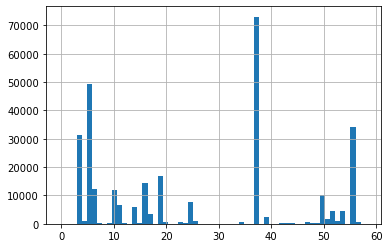

In [13]:
df.ticket_type_nm.hist(bins=60)

In [14]:
# преобразуем pass_dttm
df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

In [15]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours
0,1,40BD89EC85646EFB69E283F39C298E60,39,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5
1,2,126727A96489CC976A8C08E5CEB00542,52,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,37,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5


In [16]:
features_to_use = ['ticket_type_nm', 'entrance_id', 'station_id', 'line_id', 'pass_dttm', 'time_to_under', 'label', 'hours', 'day']
df = df[features_to_use]
df

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,hours,day
0,39,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,5,12
1,52,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5,12
2,26,110,2006,2,2022-09-12 05:00:55,865.333333,7022,5,12
3,3,110,2006,2,2022-09-12 05:01:13,1048.233333,2022,5,12
4,37,110,2006,2,2022-09-12 05:02:55,965.600000,2017,5,12
...,...,...,...,...,...,...,...,...,...
299995,37,2013,12005,12,2022-09-13 10:28:52,169.950000,3022,10,13
299996,52,236,6003,6,2022-09-13 10:28:53,334.333333,2003,10,13
299997,5,301,7016,7,2022-09-13 10:28:54,354.850000,3001,10,13
299998,56,2117,7007,7,2022-09-13 10:28:54,130.283333,7004,10,13


In [17]:
categorical_features = ['ticket_type_nm', 'entrance_id', 'station_id', 'line_id', 'label']

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(df[categorical_features])
df_transformed = ohe.transform(df[categorical_features])
df[ohe.get_feature_names()] = df_transformed
categorical_features = categorical_features[:-1]
df = df.drop(categorical_features, axis=1)
df.head()
print(categorical_features)

D:\1s\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = df_transformed
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\3132424524.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

['ticket_type_nm', 'entrance_id', 'station_id', 'line_id']


In [18]:
X = df[df.columns[2:len(df.columns)-276]]
X['day'] = df.day
X['hours'] = df.hours
X = X.drop('label', axis=1)

C:\Users\galah\AppData\Local\Temp\ipykernel_10284\597711254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['day'] = df.day
C:\Users\galah\AppData\Local\Temp\ipykernel_10284\597711254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hours'] = df.hours


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Columns: 775 entries, hours to x3_81
dtypes: float64(773), int64(2)
memory usage: 1.7 GB


In [20]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
cluster = kmeans.predict(X)
X['cluster'] = cluster

In [21]:
X['cluster']

0         10
1         10
2         10
3         10
4         10
          ..
299995     4
299996     4
299997     4
299998     4
299999     4
Name: cluster, Length: 300000, dtype: int32

In [22]:
# modeling
df.columns

Index(['pass_dttm', 'time_to_under', 'label', 'hours', 'day', 'x0_0', 'x0_1',
       'x0_2', 'x0_3', 'x0_4',
       ...
       'x4_81003', 'x4_81004', 'x4_81006', 'x4_81010', 'x4_81011', 'x4_81012',
       'x4_81013', 'x4_81014', 'x4_81015', 'x4_81016'],
      dtype='object', length=1054)

In [23]:
y_clf = df.label
y_reg = df.time_to_under

In [24]:
clf = CatBoostClassifier(iterations=100)
clf.fit(X, y_clf)

Learning rate set to 0.5
0:	learn: 5.3772766	total: 14.3s	remaining: 23m 39s
1:	learn: 5.2482240	total: 23.7s	remaining: 19m 23s
2:	learn: 5.2011351	total: 31.9s	remaining: 17m 11s
3:	learn: 5.1473003	total: 39.7s	remaining: 15m 53s
4:	learn: 5.1094633	total: 48.3s	remaining: 15m 18s
5:	learn: 5.1082281	total: 56.1s	remaining: 14m 38s
6:	learn: 5.3107304	total: 1m 3s	remaining: 14m 7s
7:	learn: 5.9276640	total: 1m 11s	remaining: 13m 42s
8:	learn: 6.2371361	total: 1m 19s	remaining: 13m 19s
9:	learn: 6.1763721	total: 1m 27s	remaining: 13m 3s
10:	learn: 6.0053247	total: 1m 34s	remaining: 12m 48s
11:	learn: 5.8537762	total: 1m 42s	remaining: 12m 33s
12:	learn: 5.7240315	total: 1m 50s	remaining: 12m 21s
13:	learn: 5.6520307	total: 1m 59s	remaining: 12m 13s
14:	learn: 5.5668338	total: 2m 7s	remaining: 12m 3s
15:	learn: 5.5381163	total: 2m 18s	remaining: 12m 5s
16:	learn: 5.5191146	total: 2m 26s	remaining: 11m 53s
17:	learn: 5.4901076	total: 2m 34s	remaining: 11m 43s
18:	learn: 5.4742548	tota

In [25]:
pred_class = clf.predict(X)
pred_class

array([[11003],
       [ 7018],
       [ 2024],
       ...,
       [ 7020],
       [ 7004],
       [ 6008]], dtype=int64)

In [26]:
# DF_pred_class = pd.DataFrame(pred_class)
# DF_pred_class.to_csv('pred_class.csv')

In [27]:
reg = CatBoostRegressor(iterations=5000)
reg.fit(X, y_reg)

Learning rate set to 0.027246
0:	learn: 198.5440204	total: 36.2ms	remaining: 3m 1s
1:	learn: 196.5403087	total: 55.5ms	remaining: 2m 18s
2:	learn: 194.6263345	total: 75.7ms	remaining: 2m 6s
3:	learn: 192.7851074	total: 93.8ms	remaining: 1m 57s
4:	learn: 191.0413058	total: 112ms	remaining: 1m 51s
5:	learn: 189.3390322	total: 130ms	remaining: 1m 48s
6:	learn: 187.7228246	total: 148ms	remaining: 1m 45s
7:	learn: 186.1849542	total: 166ms	remaining: 1m 43s
8:	learn: 184.7073150	total: 185ms	remaining: 1m 42s
9:	learn: 183.2852297	total: 203ms	remaining: 1m 41s
10:	learn: 181.9430710	total: 222ms	remaining: 1m 40s
11:	learn: 180.6683716	total: 240ms	remaining: 1m 39s
12:	learn: 179.4606691	total: 258ms	remaining: 1m 39s
13:	learn: 178.2708939	total: 277ms	remaining: 1m 38s
14:	learn: 177.1384361	total: 295ms	remaining: 1m 38s
15:	learn: 176.0772555	total: 313ms	remaining: 1m 37s
16:	learn: 175.0668316	total: 331ms	remaining: 1m 37s
17:	learn: 174.0710506	total: 349ms	remaining: 1m 36s
18:	le

160:	learn: 150.9501899	total: 2.96s	remaining: 1m 29s
161:	learn: 150.9395062	total: 2.98s	remaining: 1m 29s
162:	learn: 150.9257237	total: 3s	remaining: 1m 28s
163:	learn: 150.9157322	total: 3.02s	remaining: 1m 28s
164:	learn: 150.9068395	total: 3.03s	remaining: 1m 28s
165:	learn: 150.8982649	total: 3.05s	remaining: 1m 28s
166:	learn: 150.8901269	total: 3.07s	remaining: 1m 28s
167:	learn: 150.8797927	total: 3.08s	remaining: 1m 28s
168:	learn: 150.8709030	total: 3.1s	remaining: 1m 28s
169:	learn: 150.8612927	total: 3.12s	remaining: 1m 28s
170:	learn: 150.8540771	total: 3.13s	remaining: 1m 28s
171:	learn: 150.8421511	total: 3.15s	remaining: 1m 28s
172:	learn: 150.8342346	total: 3.17s	remaining: 1m 28s
173:	learn: 150.8213033	total: 3.19s	remaining: 1m 28s
174:	learn: 150.8130896	total: 3.2s	remaining: 1m 28s
175:	learn: 150.8048629	total: 3.22s	remaining: 1m 28s
176:	learn: 150.7987868	total: 3.24s	remaining: 1m 28s
177:	learn: 150.7916804	total: 3.26s	remaining: 1m 28s
178:	learn: 150

313:	learn: 150.1986854	total: 5.64s	remaining: 1m 24s
314:	learn: 150.1961600	total: 5.66s	remaining: 1m 24s
315:	learn: 150.1936387	total: 5.68s	remaining: 1m 24s
316:	learn: 150.1906266	total: 5.69s	remaining: 1m 24s
317:	learn: 150.1876856	total: 5.71s	remaining: 1m 24s
318:	learn: 150.1856549	total: 5.73s	remaining: 1m 24s
319:	learn: 150.1832153	total: 5.75s	remaining: 1m 24s
320:	learn: 150.1811725	total: 5.76s	remaining: 1m 24s
321:	learn: 150.1796974	total: 5.78s	remaining: 1m 23s
322:	learn: 150.1763770	total: 5.79s	remaining: 1m 23s
323:	learn: 150.1726245	total: 5.81s	remaining: 1m 23s
324:	learn: 150.1702615	total: 5.83s	remaining: 1m 23s
325:	learn: 150.1684942	total: 5.85s	remaining: 1m 23s
326:	learn: 150.1650922	total: 5.86s	remaining: 1m 23s
327:	learn: 150.1632242	total: 5.88s	remaining: 1m 23s
328:	learn: 150.1614344	total: 5.9s	remaining: 1m 23s
329:	learn: 150.1588369	total: 5.91s	remaining: 1m 23s
330:	learn: 150.1562510	total: 5.93s	remaining: 1m 23s
331:	learn:

468:	learn: 149.8885397	total: 8.29s	remaining: 1m 20s
469:	learn: 149.8864445	total: 8.31s	remaining: 1m 20s
470:	learn: 149.8846588	total: 8.33s	remaining: 1m 20s
471:	learn: 149.8823914	total: 8.34s	remaining: 1m 20s
472:	learn: 149.8806618	total: 8.36s	remaining: 1m 20s
473:	learn: 149.8783597	total: 8.38s	remaining: 1m 20s
474:	learn: 149.8774418	total: 8.4s	remaining: 1m 20s
475:	learn: 149.8747571	total: 8.42s	remaining: 1m 20s
476:	learn: 149.8725017	total: 8.43s	remaining: 1m 19s
477:	learn: 149.8706475	total: 8.45s	remaining: 1m 19s
478:	learn: 149.8691144	total: 8.46s	remaining: 1m 19s
479:	learn: 149.8671527	total: 8.48s	remaining: 1m 19s
480:	learn: 149.8646040	total: 8.5s	remaining: 1m 19s
481:	learn: 149.8624988	total: 8.52s	remaining: 1m 19s
482:	learn: 149.8602524	total: 8.53s	remaining: 1m 19s
483:	learn: 149.8586630	total: 8.55s	remaining: 1m 19s
484:	learn: 149.8565093	total: 8.57s	remaining: 1m 19s
485:	learn: 149.8551952	total: 8.58s	remaining: 1m 19s
486:	learn: 

622:	learn: 149.6349106	total: 10.9s	remaining: 1m 16s
623:	learn: 149.6328718	total: 10.9s	remaining: 1m 16s
624:	learn: 149.6315779	total: 11s	remaining: 1m 16s
625:	learn: 149.6300342	total: 11s	remaining: 1m 16s
626:	learn: 149.6288431	total: 11s	remaining: 1m 16s
627:	learn: 149.6274934	total: 11s	remaining: 1m 16s
628:	learn: 149.6261935	total: 11s	remaining: 1m 16s
629:	learn: 149.6248879	total: 11s	remaining: 1m 16s
630:	learn: 149.6233366	total: 11.1s	remaining: 1m 16s
631:	learn: 149.6221153	total: 11.1s	remaining: 1m 16s
632:	learn: 149.6206564	total: 11.1s	remaining: 1m 16s
633:	learn: 149.6195004	total: 11.1s	remaining: 1m 16s
634:	learn: 149.6176944	total: 11.1s	remaining: 1m 16s
635:	learn: 149.6167709	total: 11.1s	remaining: 1m 16s
636:	learn: 149.6158257	total: 11.2s	remaining: 1m 16s
637:	learn: 149.6141405	total: 11.2s	remaining: 1m 16s
638:	learn: 149.6129955	total: 11.2s	remaining: 1m 16s
639:	learn: 149.6114507	total: 11.2s	remaining: 1m 16s
640:	learn: 149.610355

777:	learn: 149.4443842	total: 13.5s	remaining: 1m 13s
778:	learn: 149.4432654	total: 13.6s	remaining: 1m 13s
779:	learn: 149.4421044	total: 13.6s	remaining: 1m 13s
780:	learn: 149.4400216	total: 13.6s	remaining: 1m 13s
781:	learn: 149.4392857	total: 13.6s	remaining: 1m 13s
782:	learn: 149.4379321	total: 13.6s	remaining: 1m 13s
783:	learn: 149.4364461	total: 13.6s	remaining: 1m 13s
784:	learn: 149.4354961	total: 13.7s	remaining: 1m 13s
785:	learn: 149.4343832	total: 13.7s	remaining: 1m 13s
786:	learn: 149.4332851	total: 13.7s	remaining: 1m 13s
787:	learn: 149.4322702	total: 13.7s	remaining: 1m 13s
788:	learn: 149.4313691	total: 13.7s	remaining: 1m 13s
789:	learn: 149.4301310	total: 13.8s	remaining: 1m 13s
790:	learn: 149.4291157	total: 13.8s	remaining: 1m 13s
791:	learn: 149.4283674	total: 13.8s	remaining: 1m 13s
792:	learn: 149.4276649	total: 13.8s	remaining: 1m 13s
793:	learn: 149.4265982	total: 13.8s	remaining: 1m 13s
794:	learn: 149.4249578	total: 13.8s	remaining: 1m 13s
795:	learn

934:	learn: 149.2836133	total: 16.2s	remaining: 1m 10s
935:	learn: 149.2827252	total: 16.2s	remaining: 1m 10s
936:	learn: 149.2814850	total: 16.2s	remaining: 1m 10s
937:	learn: 149.2807692	total: 16.2s	remaining: 1m 10s
938:	learn: 149.2796625	total: 16.2s	remaining: 1m 10s
939:	learn: 149.2785865	total: 16.3s	remaining: 1m 10s
940:	learn: 149.2777889	total: 16.3s	remaining: 1m 10s
941:	learn: 149.2767311	total: 16.3s	remaining: 1m 10s
942:	learn: 149.2753451	total: 16.3s	remaining: 1m 10s
943:	learn: 149.2741204	total: 16.3s	remaining: 1m 10s
944:	learn: 149.2733107	total: 16.4s	remaining: 1m 10s
945:	learn: 149.2719730	total: 16.4s	remaining: 1m 10s
946:	learn: 149.2706394	total: 16.4s	remaining: 1m 10s
947:	learn: 149.2699020	total: 16.4s	remaining: 1m 10s
948:	learn: 149.2695627	total: 16.4s	remaining: 1m 10s
949:	learn: 149.2685317	total: 16.4s	remaining: 1m 10s
950:	learn: 149.2673761	total: 16.5s	remaining: 1m 10s
951:	learn: 149.2666758	total: 16.5s	remaining: 1m 10s
952:	learn

1087:	learn: 149.1426066	total: 18.8s	remaining: 1m 7s
1088:	learn: 149.1418103	total: 18.8s	remaining: 1m 7s
1089:	learn: 149.1411088	total: 18.8s	remaining: 1m 7s
1090:	learn: 149.1404619	total: 18.8s	remaining: 1m 7s
1091:	learn: 149.1398049	total: 18.9s	remaining: 1m 7s
1092:	learn: 149.1390814	total: 18.9s	remaining: 1m 7s
1093:	learn: 149.1377024	total: 18.9s	remaining: 1m 7s
1094:	learn: 149.1368033	total: 18.9s	remaining: 1m 7s
1095:	learn: 149.1360188	total: 18.9s	remaining: 1m 7s
1096:	learn: 149.1352733	total: 18.9s	remaining: 1m 7s
1097:	learn: 149.1344778	total: 19s	remaining: 1m 7s
1098:	learn: 149.1335006	total: 19s	remaining: 1m 7s
1099:	learn: 149.1323675	total: 19s	remaining: 1m 7s
1100:	learn: 149.1314755	total: 19s	remaining: 1m 7s
1101:	learn: 149.1304723	total: 19s	remaining: 1m 7s
1102:	learn: 149.1294630	total: 19s	remaining: 1m 7s
1103:	learn: 149.1286064	total: 19.1s	remaining: 1m 7s
1104:	learn: 149.1278993	total: 19.1s	remaining: 1m 7s
1105:	learn: 149.12728

1238:	learn: 149.0228132	total: 21.5s	remaining: 1m 5s
1239:	learn: 149.0221902	total: 21.5s	remaining: 1m 5s
1240:	learn: 149.0216672	total: 21.5s	remaining: 1m 5s
1241:	learn: 149.0208502	total: 21.5s	remaining: 1m 5s
1242:	learn: 149.0201931	total: 21.6s	remaining: 1m 5s
1243:	learn: 149.0195573	total: 21.6s	remaining: 1m 5s
1244:	learn: 149.0186320	total: 21.6s	remaining: 1m 5s
1245:	learn: 149.0179861	total: 21.6s	remaining: 1m 5s
1246:	learn: 149.0176195	total: 21.6s	remaining: 1m 5s
1247:	learn: 149.0168134	total: 21.6s	remaining: 1m 5s
1248:	learn: 149.0159337	total: 21.7s	remaining: 1m 5s
1249:	learn: 149.0154116	total: 21.7s	remaining: 1m 5s
1250:	learn: 149.0146234	total: 21.7s	remaining: 1m 5s
1251:	learn: 149.0138608	total: 21.7s	remaining: 1m 4s
1252:	learn: 149.0131405	total: 21.7s	remaining: 1m 4s
1253:	learn: 149.0121189	total: 21.7s	remaining: 1m 4s
1254:	learn: 149.0115510	total: 21.8s	remaining: 1m 4s
1255:	learn: 149.0106233	total: 21.8s	remaining: 1m 4s
1256:	lear

1394:	learn: 148.9051190	total: 24.1s	remaining: 1m 2s
1395:	learn: 148.9042440	total: 24.1s	remaining: 1m 2s
1396:	learn: 148.9034972	total: 24.1s	remaining: 1m 2s
1397:	learn: 148.9024039	total: 24.1s	remaining: 1m 2s
1398:	learn: 148.9014400	total: 24.2s	remaining: 1m 2s
1399:	learn: 148.9008503	total: 24.2s	remaining: 1m 2s
1400:	learn: 148.9001831	total: 24.2s	remaining: 1m 2s
1401:	learn: 148.8998754	total: 24.2s	remaining: 1m 2s
1402:	learn: 148.8993977	total: 24.2s	remaining: 1m 2s
1403:	learn: 148.8986414	total: 24.3s	remaining: 1m 2s
1404:	learn: 148.8978573	total: 24.3s	remaining: 1m 2s
1405:	learn: 148.8970930	total: 24.3s	remaining: 1m 2s
1406:	learn: 148.8962938	total: 24.3s	remaining: 1m 2s
1407:	learn: 148.8958203	total: 24.3s	remaining: 1m 2s
1408:	learn: 148.8949931	total: 24.3s	remaining: 1m 2s
1409:	learn: 148.8944442	total: 24.4s	remaining: 1m 2s
1410:	learn: 148.8936824	total: 24.4s	remaining: 1m 1s
1411:	learn: 148.8933835	total: 24.4s	remaining: 1m 1s
1412:	lear

1551:	learn: 148.7965816	total: 26.7s	remaining: 59.4s
1552:	learn: 148.7959687	total: 26.7s	remaining: 59.3s
1553:	learn: 148.7955601	total: 26.7s	remaining: 59.3s
1554:	learn: 148.7948208	total: 26.8s	remaining: 59.3s
1555:	learn: 148.7943769	total: 26.8s	remaining: 59.3s
1556:	learn: 148.7938862	total: 26.8s	remaining: 59.3s
1557:	learn: 148.7933754	total: 26.8s	remaining: 59.2s
1558:	learn: 148.7927979	total: 26.8s	remaining: 59.2s
1559:	learn: 148.7924316	total: 26.8s	remaining: 59.2s
1560:	learn: 148.7916268	total: 26.9s	remaining: 59.2s
1561:	learn: 148.7907775	total: 26.9s	remaining: 59.2s
1562:	learn: 148.7898083	total: 26.9s	remaining: 59.1s
1563:	learn: 148.7892542	total: 26.9s	remaining: 59.1s
1564:	learn: 148.7885511	total: 26.9s	remaining: 59.1s
1565:	learn: 148.7877696	total: 26.9s	remaining: 59.1s
1566:	learn: 148.7871096	total: 27s	remaining: 59.1s
1567:	learn: 148.7866929	total: 27s	remaining: 59s
1568:	learn: 148.7862831	total: 27s	remaining: 59s
1569:	learn: 148.785

1710:	learn: 148.6956468	total: 29.4s	remaining: 56.5s
1711:	learn: 148.6947726	total: 29.4s	remaining: 56.5s
1712:	learn: 148.6942660	total: 29.4s	remaining: 56.4s
1713:	learn: 148.6933432	total: 29.4s	remaining: 56.4s
1714:	learn: 148.6929187	total: 29.4s	remaining: 56.4s
1715:	learn: 148.6922480	total: 29.5s	remaining: 56.4s
1716:	learn: 148.6914744	total: 29.5s	remaining: 56.4s
1717:	learn: 148.6905102	total: 29.5s	remaining: 56.3s
1718:	learn: 148.6899546	total: 29.5s	remaining: 56.3s
1719:	learn: 148.6895632	total: 29.5s	remaining: 56.3s
1720:	learn: 148.6889643	total: 29.5s	remaining: 56.3s
1721:	learn: 148.6882787	total: 29.6s	remaining: 56.3s
1722:	learn: 148.6876277	total: 29.6s	remaining: 56.3s
1723:	learn: 148.6872319	total: 29.6s	remaining: 56.2s
1724:	learn: 148.6866556	total: 29.6s	remaining: 56.2s
1725:	learn: 148.6860450	total: 29.6s	remaining: 56.2s
1726:	learn: 148.6852224	total: 29.6s	remaining: 56.2s
1727:	learn: 148.6847794	total: 29.7s	remaining: 56.2s
1728:	lear

1869:	learn: 148.5992378	total: 32s	remaining: 53.6s
1870:	learn: 148.5983899	total: 32s	remaining: 53.6s
1871:	learn: 148.5979702	total: 32.1s	remaining: 53.6s
1872:	learn: 148.5975282	total: 32.1s	remaining: 53.6s
1873:	learn: 148.5968519	total: 32.1s	remaining: 53.5s
1874:	learn: 148.5962125	total: 32.1s	remaining: 53.5s
1875:	learn: 148.5955828	total: 32.1s	remaining: 53.5s
1876:	learn: 148.5950586	total: 32.1s	remaining: 53.5s
1877:	learn: 148.5944052	total: 32.2s	remaining: 53.5s
1878:	learn: 148.5935904	total: 32.2s	remaining: 53.5s
1879:	learn: 148.5931288	total: 32.2s	remaining: 53.4s
1880:	learn: 148.5926169	total: 32.2s	remaining: 53.4s
1881:	learn: 148.5918155	total: 32.2s	remaining: 53.4s
1882:	learn: 148.5908856	total: 32.3s	remaining: 53.4s
1883:	learn: 148.5902266	total: 32.3s	remaining: 53.4s
1884:	learn: 148.5896142	total: 32.3s	remaining: 53.4s
1885:	learn: 148.5890629	total: 32.3s	remaining: 53.3s
1886:	learn: 148.5886893	total: 32.3s	remaining: 53.3s
1887:	learn: 1

2029:	learn: 148.5046783	total: 34.7s	remaining: 50.8s
2030:	learn: 148.5043132	total: 34.7s	remaining: 50.7s
2031:	learn: 148.5037546	total: 34.7s	remaining: 50.7s
2032:	learn: 148.5026940	total: 34.7s	remaining: 50.7s
2033:	learn: 148.5021941	total: 34.8s	remaining: 50.7s
2034:	learn: 148.5016229	total: 34.8s	remaining: 50.7s
2035:	learn: 148.5009831	total: 34.8s	remaining: 50.7s
2036:	learn: 148.5004680	total: 34.8s	remaining: 50.6s
2037:	learn: 148.4998546	total: 34.8s	remaining: 50.6s
2038:	learn: 148.4994962	total: 34.8s	remaining: 50.6s
2039:	learn: 148.4992055	total: 34.9s	remaining: 50.6s
2040:	learn: 148.4987193	total: 34.9s	remaining: 50.6s
2041:	learn: 148.4983681	total: 34.9s	remaining: 50.5s
2042:	learn: 148.4974509	total: 34.9s	remaining: 50.5s
2043:	learn: 148.4972046	total: 34.9s	remaining: 50.5s
2044:	learn: 148.4968515	total: 34.9s	remaining: 50.5s
2045:	learn: 148.4964934	total: 35s	remaining: 50.5s
2046:	learn: 148.4959533	total: 35s	remaining: 50.5s
2047:	learn: 1

2186:	learn: 148.4175997	total: 37.3s	remaining: 48s
2187:	learn: 148.4170484	total: 37.3s	remaining: 48s
2188:	learn: 148.4166163	total: 37.3s	remaining: 48s
2189:	learn: 148.4160066	total: 37.4s	remaining: 47.9s
2190:	learn: 148.4157961	total: 37.4s	remaining: 47.9s
2191:	learn: 148.4154493	total: 37.4s	remaining: 47.9s
2192:	learn: 148.4146591	total: 37.4s	remaining: 47.9s
2193:	learn: 148.4142137	total: 37.4s	remaining: 47.9s
2194:	learn: 148.4140380	total: 37.4s	remaining: 47.9s
2195:	learn: 148.4134274	total: 37.5s	remaining: 47.8s
2196:	learn: 148.4131674	total: 37.5s	remaining: 47.8s
2197:	learn: 148.4127827	total: 37.5s	remaining: 47.8s
2198:	learn: 148.4122054	total: 37.5s	remaining: 47.8s
2199:	learn: 148.4118694	total: 37.5s	remaining: 47.8s
2200:	learn: 148.4113292	total: 37.5s	remaining: 47.7s
2201:	learn: 148.4107571	total: 37.6s	remaining: 47.7s
2202:	learn: 148.4100245	total: 37.6s	remaining: 47.7s
2203:	learn: 148.4093749	total: 37.6s	remaining: 47.7s
2204:	learn: 148

2342:	learn: 148.3386926	total: 39.9s	remaining: 45.3s
2343:	learn: 148.3383751	total: 40s	remaining: 45.3s
2344:	learn: 148.3378778	total: 40s	remaining: 45.3s
2345:	learn: 148.3376055	total: 40s	remaining: 45.2s
2346:	learn: 148.3370709	total: 40s	remaining: 45.2s
2347:	learn: 148.3366136	total: 40s	remaining: 45.2s
2348:	learn: 148.3359614	total: 40s	remaining: 45.2s
2349:	learn: 148.3354352	total: 40.1s	remaining: 45.2s
2350:	learn: 148.3347324	total: 40.1s	remaining: 45.2s
2351:	learn: 148.3342449	total: 40.1s	remaining: 45.1s
2352:	learn: 148.3340384	total: 40.1s	remaining: 45.1s
2353:	learn: 148.3336187	total: 40.1s	remaining: 45.1s
2354:	learn: 148.3334332	total: 40.1s	remaining: 45.1s
2355:	learn: 148.3331705	total: 40.2s	remaining: 45.1s
2356:	learn: 148.3324700	total: 40.2s	remaining: 45s
2357:	learn: 148.3321697	total: 40.2s	remaining: 45s
2358:	learn: 148.3316809	total: 40.2s	remaining: 45s
2359:	learn: 148.3314987	total: 40.2s	remaining: 45s
2360:	learn: 148.3307783	total

2499:	learn: 148.2621989	total: 42.6s	remaining: 42.6s
2500:	learn: 148.2616374	total: 42.6s	remaining: 42.5s
2501:	learn: 148.2610542	total: 42.6s	remaining: 42.5s
2502:	learn: 148.2604224	total: 42.6s	remaining: 42.5s
2503:	learn: 148.2597363	total: 42.6s	remaining: 42.5s
2504:	learn: 148.2591460	total: 42.6s	remaining: 42.5s
2505:	learn: 148.2586526	total: 42.7s	remaining: 42.5s
2506:	learn: 148.2581799	total: 42.7s	remaining: 42.4s
2507:	learn: 148.2576128	total: 42.7s	remaining: 42.4s
2508:	learn: 148.2572945	total: 42.7s	remaining: 42.4s
2509:	learn: 148.2568535	total: 42.7s	remaining: 42.4s
2510:	learn: 148.2566843	total: 42.8s	remaining: 42.4s
2511:	learn: 148.2564069	total: 42.8s	remaining: 42.4s
2512:	learn: 148.2558765	total: 42.8s	remaining: 42.3s
2513:	learn: 148.2552981	total: 42.8s	remaining: 42.3s
2514:	learn: 148.2546941	total: 42.8s	remaining: 42.3s
2515:	learn: 148.2540872	total: 42.8s	remaining: 42.3s
2516:	learn: 148.2538358	total: 42.9s	remaining: 42.3s
2517:	lear

2659:	learn: 148.1838172	total: 45.4s	remaining: 39.9s
2660:	learn: 148.1835532	total: 45.4s	remaining: 39.9s
2661:	learn: 148.1831783	total: 45.4s	remaining: 39.9s
2662:	learn: 148.1825902	total: 45.4s	remaining: 39.9s
2663:	learn: 148.1820032	total: 45.4s	remaining: 39.8s
2664:	learn: 148.1814534	total: 45.5s	remaining: 39.8s
2665:	learn: 148.1808849	total: 45.5s	remaining: 39.8s
2666:	learn: 148.1802468	total: 45.5s	remaining: 39.8s
2667:	learn: 148.1798116	total: 45.5s	remaining: 39.8s
2668:	learn: 148.1796230	total: 45.5s	remaining: 39.8s
2669:	learn: 148.1790927	total: 45.5s	remaining: 39.7s
2670:	learn: 148.1783642	total: 45.6s	remaining: 39.7s
2671:	learn: 148.1779075	total: 45.6s	remaining: 39.7s
2672:	learn: 148.1771837	total: 45.6s	remaining: 39.7s
2673:	learn: 148.1766067	total: 45.6s	remaining: 39.7s
2674:	learn: 148.1762590	total: 45.6s	remaining: 39.7s
2675:	learn: 148.1759690	total: 45.7s	remaining: 39.6s
2676:	learn: 148.1753400	total: 45.7s	remaining: 39.6s
2677:	lear

2815:	learn: 148.1136656	total: 48.2s	remaining: 37.4s
2816:	learn: 148.1133896	total: 48.2s	remaining: 37.4s
2817:	learn: 148.1127664	total: 48.3s	remaining: 37.4s
2818:	learn: 148.1123697	total: 48.3s	remaining: 37.4s
2819:	learn: 148.1121096	total: 48.3s	remaining: 37.3s
2820:	learn: 148.1116589	total: 48.3s	remaining: 37.3s
2821:	learn: 148.1109176	total: 48.3s	remaining: 37.3s
2822:	learn: 148.1104070	total: 48.3s	remaining: 37.3s
2823:	learn: 148.1100634	total: 48.4s	remaining: 37.3s
2824:	learn: 148.1095066	total: 48.4s	remaining: 37.2s
2825:	learn: 148.1089632	total: 48.4s	remaining: 37.2s
2826:	learn: 148.1083500	total: 48.4s	remaining: 37.2s
2827:	learn: 148.1077921	total: 48.4s	remaining: 37.2s
2828:	learn: 148.1070916	total: 48.5s	remaining: 37.2s
2829:	learn: 148.1064486	total: 48.5s	remaining: 37.2s
2830:	learn: 148.1061144	total: 48.5s	remaining: 37.1s
2831:	learn: 148.1057479	total: 48.5s	remaining: 37.1s
2832:	learn: 148.1055073	total: 48.5s	remaining: 37.1s
2833:	lear

2971:	learn: 148.0439282	total: 51.2s	remaining: 34.9s
2972:	learn: 148.0435208	total: 51.2s	remaining: 34.9s
2973:	learn: 148.0432439	total: 51.2s	remaining: 34.9s
2974:	learn: 148.0427033	total: 51.2s	remaining: 34.9s
2975:	learn: 148.0421067	total: 51.2s	remaining: 34.8s
2976:	learn: 148.0416855	total: 51.2s	remaining: 34.8s
2977:	learn: 148.0411508	total: 51.3s	remaining: 34.8s
2978:	learn: 148.0405437	total: 51.3s	remaining: 34.8s
2979:	learn: 148.0402673	total: 51.3s	remaining: 34.8s
2980:	learn: 148.0398215	total: 51.3s	remaining: 34.8s
2981:	learn: 148.0394549	total: 51.3s	remaining: 34.7s
2982:	learn: 148.0391942	total: 51.4s	remaining: 34.7s
2983:	learn: 148.0388465	total: 51.4s	remaining: 34.7s
2984:	learn: 148.0385898	total: 51.4s	remaining: 34.7s
2985:	learn: 148.0383231	total: 51.4s	remaining: 34.7s
2986:	learn: 148.0379482	total: 51.4s	remaining: 34.7s
2987:	learn: 148.0377232	total: 51.4s	remaining: 34.6s
2988:	learn: 148.0371984	total: 51.5s	remaining: 34.6s
2989:	lear

3121:	learn: 147.9801638	total: 53.8s	remaining: 32.3s
3122:	learn: 147.9799930	total: 53.8s	remaining: 32.3s
3123:	learn: 147.9797685	total: 53.8s	remaining: 32.3s
3124:	learn: 147.9793752	total: 53.8s	remaining: 32.3s
3125:	learn: 147.9788546	total: 53.8s	remaining: 32.3s
3126:	learn: 147.9785255	total: 53.8s	remaining: 32.2s
3127:	learn: 147.9781426	total: 53.9s	remaining: 32.2s
3128:	learn: 147.9776639	total: 53.9s	remaining: 32.2s
3129:	learn: 147.9772133	total: 53.9s	remaining: 32.2s
3130:	learn: 147.9768397	total: 53.9s	remaining: 32.2s
3131:	learn: 147.9763161	total: 53.9s	remaining: 32.2s
3132:	learn: 147.9758220	total: 53.9s	remaining: 32.1s
3133:	learn: 147.9752885	total: 53.9s	remaining: 32.1s
3134:	learn: 147.9746723	total: 54s	remaining: 32.1s
3135:	learn: 147.9741569	total: 54s	remaining: 32.1s
3136:	learn: 147.9736796	total: 54s	remaining: 32.1s
3137:	learn: 147.9731232	total: 54s	remaining: 32s
3138:	learn: 147.9724707	total: 54s	remaining: 32s
3139:	learn: 147.9718842

3282:	learn: 147.9127714	total: 56.4s	remaining: 29.5s
3283:	learn: 147.9121267	total: 56.4s	remaining: 29.5s
3284:	learn: 147.9115609	total: 56.4s	remaining: 29.5s
3285:	learn: 147.9114460	total: 56.5s	remaining: 29.5s
3286:	learn: 147.9110423	total: 56.5s	remaining: 29.4s
3287:	learn: 147.9104091	total: 56.5s	remaining: 29.4s
3288:	learn: 147.9098544	total: 56.5s	remaining: 29.4s
3289:	learn: 147.9093677	total: 56.5s	remaining: 29.4s
3290:	learn: 147.9090590	total: 56.5s	remaining: 29.4s
3291:	learn: 147.9085749	total: 56.6s	remaining: 29.3s
3292:	learn: 147.9080407	total: 56.6s	remaining: 29.3s
3293:	learn: 147.9075725	total: 56.6s	remaining: 29.3s
3294:	learn: 147.9073549	total: 56.6s	remaining: 29.3s
3295:	learn: 147.9068869	total: 56.6s	remaining: 29.3s
3296:	learn: 147.9063858	total: 56.6s	remaining: 29.3s
3297:	learn: 147.9060667	total: 56.7s	remaining: 29.2s
3298:	learn: 147.9056817	total: 56.7s	remaining: 29.2s
3299:	learn: 147.9054214	total: 56.7s	remaining: 29.2s
3300:	lear

3445:	learn: 147.8465454	total: 59.1s	remaining: 26.7s
3446:	learn: 147.8462107	total: 59.1s	remaining: 26.6s
3447:	learn: 147.8456778	total: 59.2s	remaining: 26.6s
3448:	learn: 147.8450186	total: 59.2s	remaining: 26.6s
3449:	learn: 147.8445906	total: 59.2s	remaining: 26.6s
3450:	learn: 147.8439321	total: 59.2s	remaining: 26.6s
3451:	learn: 147.8434153	total: 59.2s	remaining: 26.6s
3452:	learn: 147.8429081	total: 59.2s	remaining: 26.5s
3453:	learn: 147.8424367	total: 59.3s	remaining: 26.5s
3454:	learn: 147.8419738	total: 59.3s	remaining: 26.5s
3455:	learn: 147.8415917	total: 59.3s	remaining: 26.5s
3456:	learn: 147.8412334	total: 59.3s	remaining: 26.5s
3457:	learn: 147.8407752	total: 59.3s	remaining: 26.5s
3458:	learn: 147.8404838	total: 59.3s	remaining: 26.4s
3459:	learn: 147.8401129	total: 59.4s	remaining: 26.4s
3460:	learn: 147.8398389	total: 59.4s	remaining: 26.4s
3461:	learn: 147.8396327	total: 59.4s	remaining: 26.4s
3462:	learn: 147.8389779	total: 59.4s	remaining: 26.4s
3463:	lear

3606:	learn: 147.7810054	total: 1m 1s	remaining: 23.9s
3607:	learn: 147.7808010	total: 1m 1s	remaining: 23.8s
3608:	learn: 147.7806459	total: 1m 1s	remaining: 23.8s
3609:	learn: 147.7804320	total: 1m 1s	remaining: 23.8s
3610:	learn: 147.7799969	total: 1m 1s	remaining: 23.8s
3611:	learn: 147.7795010	total: 1m 1s	remaining: 23.8s
3612:	learn: 147.7790887	total: 1m 1s	remaining: 23.8s
3613:	learn: 147.7785360	total: 1m 1s	remaining: 23.7s
3614:	learn: 147.7781886	total: 1m 1s	remaining: 23.7s
3615:	learn: 147.7779623	total: 1m 1s	remaining: 23.7s
3616:	learn: 147.7776468	total: 1m 1s	remaining: 23.7s
3617:	learn: 147.7771463	total: 1m 1s	remaining: 23.7s
3618:	learn: 147.7769259	total: 1m 1s	remaining: 23.7s
3619:	learn: 147.7766708	total: 1m 2s	remaining: 23.6s
3620:	learn: 147.7761832	total: 1m 2s	remaining: 23.6s
3621:	learn: 147.7755724	total: 1m 2s	remaining: 23.6s
3622:	learn: 147.7750811	total: 1m 2s	remaining: 23.6s
3623:	learn: 147.7746260	total: 1m 2s	remaining: 23.6s
3624:	lear

3763:	learn: 147.7205366	total: 1m 4s	remaining: 21.1s
3764:	learn: 147.7200845	total: 1m 4s	remaining: 21.1s
3765:	learn: 147.7198911	total: 1m 4s	remaining: 21.1s
3766:	learn: 147.7193811	total: 1m 4s	remaining: 21.1s
3767:	learn: 147.7190202	total: 1m 4s	remaining: 21.1s
3768:	learn: 147.7187969	total: 1m 4s	remaining: 21.1s
3769:	learn: 147.7183080	total: 1m 4s	remaining: 21s
3770:	learn: 147.7181415	total: 1m 4s	remaining: 21s
3771:	learn: 147.7177004	total: 1m 4s	remaining: 21s
3772:	learn: 147.7173560	total: 1m 4s	remaining: 21s
3773:	learn: 147.7171628	total: 1m 4s	remaining: 21s
3774:	learn: 147.7166425	total: 1m 4s	remaining: 21s
3775:	learn: 147.7160658	total: 1m 4s	remaining: 20.9s
3776:	learn: 147.7156439	total: 1m 4s	remaining: 20.9s
3777:	learn: 147.7154793	total: 1m 4s	remaining: 20.9s
3778:	learn: 147.7151263	total: 1m 4s	remaining: 20.9s
3779:	learn: 147.7149416	total: 1m 4s	remaining: 20.9s
3780:	learn: 147.7147078	total: 1m 4s	remaining: 20.9s
3781:	learn: 147.71436

3921:	learn: 147.6635484	total: 1m 7s	remaining: 18.4s
3922:	learn: 147.6629316	total: 1m 7s	remaining: 18.4s
3923:	learn: 147.6621537	total: 1m 7s	remaining: 18.4s
3924:	learn: 147.6616184	total: 1m 7s	remaining: 18.4s
3925:	learn: 147.6614208	total: 1m 7s	remaining: 18.4s
3926:	learn: 147.6611585	total: 1m 7s	remaining: 18.3s
3927:	learn: 147.6606911	total: 1m 7s	remaining: 18.3s
3928:	learn: 147.6603694	total: 1m 7s	remaining: 18.3s
3929:	learn: 147.6597692	total: 1m 7s	remaining: 18.3s
3930:	learn: 147.6595667	total: 1m 7s	remaining: 18.3s
3931:	learn: 147.6590113	total: 1m 7s	remaining: 18.3s
3932:	learn: 147.6585927	total: 1m 7s	remaining: 18.2s
3933:	learn: 147.6584306	total: 1m 7s	remaining: 18.2s
3934:	learn: 147.6582265	total: 1m 7s	remaining: 18.2s
3935:	learn: 147.6578583	total: 1m 7s	remaining: 18.2s
3936:	learn: 147.6576711	total: 1m 7s	remaining: 18.2s
3937:	learn: 147.6572666	total: 1m 7s	remaining: 18.2s
3938:	learn: 147.6571637	total: 1m 7s	remaining: 18.1s
3939:	lear

4077:	learn: 147.6089990	total: 1m 9s	remaining: 15.8s
4078:	learn: 147.6088433	total: 1m 9s	remaining: 15.7s
4079:	learn: 147.6084261	total: 1m 9s	remaining: 15.7s
4080:	learn: 147.6080033	total: 1m 9s	remaining: 15.7s
4081:	learn: 147.6075600	total: 1m 9s	remaining: 15.7s
4082:	learn: 147.6074196	total: 1m 9s	remaining: 15.7s
4083:	learn: 147.6068499	total: 1m 9s	remaining: 15.7s
4084:	learn: 147.6063198	total: 1m 9s	remaining: 15.6s
4085:	learn: 147.6058886	total: 1m 9s	remaining: 15.6s
4086:	learn: 147.6055031	total: 1m 9s	remaining: 15.6s
4087:	learn: 147.6052366	total: 1m 9s	remaining: 15.6s
4088:	learn: 147.6046781	total: 1m 9s	remaining: 15.6s
4089:	learn: 147.6042046	total: 1m 9s	remaining: 15.5s
4090:	learn: 147.6037922	total: 1m 9s	remaining: 15.5s
4091:	learn: 147.6033923	total: 1m 9s	remaining: 15.5s
4092:	learn: 147.6032506	total: 1m 9s	remaining: 15.5s
4093:	learn: 147.6029537	total: 1m 9s	remaining: 15.5s
4094:	learn: 147.6024464	total: 1m 9s	remaining: 15.5s
4095:	lear

4235:	learn: 147.5544731	total: 1m 12s	remaining: 13s
4236:	learn: 147.5542379	total: 1m 12s	remaining: 13s
4237:	learn: 147.5540692	total: 1m 12s	remaining: 13s
4238:	learn: 147.5537185	total: 1m 12s	remaining: 13s
4239:	learn: 147.5533370	total: 1m 12s	remaining: 13s
4240:	learn: 147.5531959	total: 1m 12s	remaining: 13s
4241:	learn: 147.5529285	total: 1m 12s	remaining: 12.9s
4242:	learn: 147.5524057	total: 1m 12s	remaining: 12.9s
4243:	learn: 147.5520171	total: 1m 12s	remaining: 12.9s
4244:	learn: 147.5515893	total: 1m 12s	remaining: 12.9s
4245:	learn: 147.5512768	total: 1m 12s	remaining: 12.9s
4246:	learn: 147.5509186	total: 1m 12s	remaining: 12.9s
4247:	learn: 147.5507821	total: 1m 12s	remaining: 12.8s
4248:	learn: 147.5502897	total: 1m 12s	remaining: 12.8s
4249:	learn: 147.5497855	total: 1m 12s	remaining: 12.8s
4250:	learn: 147.5493678	total: 1m 12s	remaining: 12.8s
4251:	learn: 147.5490172	total: 1m 12s	remaining: 12.8s
4252:	learn: 147.5487782	total: 1m 12s	remaining: 12.7s
4253

4392:	learn: 147.5011437	total: 1m 14s	remaining: 10.3s
4393:	learn: 147.5007508	total: 1m 14s	remaining: 10.3s
4394:	learn: 147.5006012	total: 1m 14s	remaining: 10.3s
4395:	learn: 147.4999233	total: 1m 14s	remaining: 10.3s
4396:	learn: 147.4993666	total: 1m 14s	remaining: 10.3s
4397:	learn: 147.4989618	total: 1m 14s	remaining: 10.3s
4398:	learn: 147.4984015	total: 1m 15s	remaining: 10.2s
4399:	learn: 147.4980504	total: 1m 15s	remaining: 10.2s
4400:	learn: 147.4976822	total: 1m 15s	remaining: 10.2s
4401:	learn: 147.4971261	total: 1m 15s	remaining: 10.2s
4402:	learn: 147.4969971	total: 1m 15s	remaining: 10.2s
4403:	learn: 147.4963674	total: 1m 15s	remaining: 10.2s
4404:	learn: 147.4961837	total: 1m 15s	remaining: 10.1s
4405:	learn: 147.4958711	total: 1m 15s	remaining: 10.1s
4406:	learn: 147.4957366	total: 1m 15s	remaining: 10.1s
4407:	learn: 147.4955362	total: 1m 15s	remaining: 10.1s
4408:	learn: 147.4950116	total: 1m 15s	remaining: 10.1s
4409:	learn: 147.4948572	total: 1m 15s	remaining

4539:	learn: 147.4507932	total: 1m 17s	remaining: 7.84s
4540:	learn: 147.4502163	total: 1m 17s	remaining: 7.82s
4541:	learn: 147.4497550	total: 1m 17s	remaining: 7.8s
4542:	learn: 147.4491914	total: 1m 17s	remaining: 7.79s
4543:	learn: 147.4487566	total: 1m 17s	remaining: 7.77s
4544:	learn: 147.4482850	total: 1m 17s	remaining: 7.75s
4545:	learn: 147.4481079	total: 1m 17s	remaining: 7.73s
4546:	learn: 147.4476990	total: 1m 17s	remaining: 7.72s
4547:	learn: 147.4470694	total: 1m 17s	remaining: 7.7s
4548:	learn: 147.4467201	total: 1m 17s	remaining: 7.68s
4549:	learn: 147.4465071	total: 1m 17s	remaining: 7.67s
4550:	learn: 147.4460777	total: 1m 17s	remaining: 7.65s
4551:	learn: 147.4458333	total: 1m 17s	remaining: 7.63s
4552:	learn: 147.4457265	total: 1m 17s	remaining: 7.61s
4553:	learn: 147.4452853	total: 1m 17s	remaining: 7.6s
4554:	learn: 147.4450094	total: 1m 17s	remaining: 7.58s
4555:	learn: 147.4446499	total: 1m 17s	remaining: 7.56s
4556:	learn: 147.4444934	total: 1m 17s	remaining: 7

4688:	learn: 147.4024102	total: 1m 19s	remaining: 5.29s
4689:	learn: 147.4020311	total: 1m 19s	remaining: 5.28s
4690:	learn: 147.4018526	total: 1m 19s	remaining: 5.26s
4691:	learn: 147.4015366	total: 1m 19s	remaining: 5.24s
4692:	learn: 147.4011357	total: 1m 19s	remaining: 5.22s
4693:	learn: 147.4009437	total: 1m 19s	remaining: 5.21s
4694:	learn: 147.4005212	total: 1m 19s	remaining: 5.19s
4695:	learn: 147.4001832	total: 1m 19s	remaining: 5.17s
4696:	learn: 147.4000335	total: 1m 19s	remaining: 5.16s
4697:	learn: 147.3998032	total: 1m 19s	remaining: 5.14s
4698:	learn: 147.3996847	total: 1m 19s	remaining: 5.12s
4699:	learn: 147.3994820	total: 1m 19s	remaining: 5.11s
4700:	learn: 147.3988903	total: 1m 20s	remaining: 5.09s
4701:	learn: 147.3987401	total: 1m 20s	remaining: 5.07s
4702:	learn: 147.3983997	total: 1m 20s	remaining: 5.05s
4703:	learn: 147.3980091	total: 1m 20s	remaining: 5.04s
4704:	learn: 147.3977979	total: 1m 20s	remaining: 5.02s
4705:	learn: 147.3975621	total: 1m 20s	remaining

4846:	learn: 147.3511966	total: 1m 22s	remaining: 2.6s
4847:	learn: 147.3509712	total: 1m 22s	remaining: 2.58s
4848:	learn: 147.3508333	total: 1m 22s	remaining: 2.57s
4849:	learn: 147.3506296	total: 1m 22s	remaining: 2.55s
4850:	learn: 147.3504187	total: 1m 22s	remaining: 2.53s
4851:	learn: 147.3498005	total: 1m 22s	remaining: 2.52s
4852:	learn: 147.3495085	total: 1m 22s	remaining: 2.5s
4853:	learn: 147.3491715	total: 1m 22s	remaining: 2.48s
4854:	learn: 147.3486644	total: 1m 22s	remaining: 2.47s
4855:	learn: 147.3485306	total: 1m 22s	remaining: 2.45s
4856:	learn: 147.3484144	total: 1m 22s	remaining: 2.43s
4857:	learn: 147.3482626	total: 1m 22s	remaining: 2.42s
4858:	learn: 147.3480495	total: 1m 22s	remaining: 2.4s
4859:	learn: 147.3476138	total: 1m 22s	remaining: 2.38s
4860:	learn: 147.3473620	total: 1m 22s	remaining: 2.36s
4861:	learn: 147.3471632	total: 1m 22s	remaining: 2.35s
4862:	learn: 147.3467480	total: 1m 22s	remaining: 2.33s
4863:	learn: 147.3465194	total: 1m 22s	remaining: 2

In [28]:
pred_class = clf.predict(X)
pred_reg = reg.predict(X)

In [29]:
# eval
score = 0.5 * recall_score(y_clf, pred_class , average='macro') +  0.5 * r2_score(y_reg, pred_reg)
score

0.2576556733066751